In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.precision', 2)

In [2]:
df = pd.read_csv('realestate_texas.csv')
df.head()

,city,year,month,sales,volume,median_price,listings,months_inventory
0,Beaumont,2010,1,83,14.16,163800.0,1533,9.5
1,Beaumont,2010,2,108,17.69,138200.0,1586,10.0
2,Beaumont,2010,3,182,28.70,122400.0,1689,10.6
3,Beaumont,2010,4,200,26.82,123200.0,1708,10.6
4,Beaumont,2010,5,202,28.83,123100.0,1771,10.9


In [7]:
pd.DataFrame({
    'sales': df['sales'].describe(),
    'volume': df['volume'].describe(),
    'median_price': df['median_price'].describe(),
    'listings': df['listings'].describe(),
    'months_inventory': df['months_inventory'].describe(),
})

,sales,volume,median_price,listings,months_inventory
count,240.00,240.00,240.00,240.00,240.00
mean,192.29,31.01,132665.42,1738.02,9.19
std,79.65,16.65,22662.15,752.71,2.30
min,79.00,8.17,73800.00,743.00,3.40
25%,127.00,17.66,117300.00,1026.50,7.80
50%,175.50,27.06,134500.00,1618.50,8.95
75%,247.00,40.89,150050.00,2056.00,10.95
max,423.00,83.55,180000.00,3296.00,14.90


In [8]:
df_freq_ass = df['city'].value_counts()
df_freq_rel = df['city'].value_counts()/len(df['city'])
pd.DataFrame({'freq_ass': df_freq_ass, 'freq_rel': df_freq_rel})

,freq_ass,freq_rel
city,,
Beaumont,60,0.25
Bryan-College Station,60,0.25
Tyler,60,0.25
Wichita Falls,60,0.25


In [9]:
df_freq_ass = df['year'].value_counts()
df_freq_rel = df['year'].value_counts()/len(df['year'])
pd.DataFrame({'freq_ass': df_freq_ass, 'freq_rel': df_freq_rel})

,freq_ass,freq_rel
year,,
2010,48,0.2
2011,48,0.2
2012,48,0.2
2013,48,0.2
2014,48,0.2


In [10]:
df_freq_ass = df['month'].value_counts()
df_freq_rel = df['month'].value_counts()/len(df['month'])
pd.DataFrame({'freq_ass': df_freq_ass, 'freq_rel': df_freq_rel})

,freq_ass,freq_rel
month,,
1,20,0.08
2,20,0.08
3,20,0.08
4,20,0.08
5,20,0.08
6,20,0.08
7,20,0.08
8,20,0.08
9,20,0.08


In [11]:
new_df = df[['sales','volume','median_price','listings','months_inventory']].copy()
new_df.std()/new_df.mean()*100

sales               41.42
volume              53.71
median_price        17.08
listings            43.31
months_inventory    25.06
dtype: float64

In [21]:
def gini_index(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

print('sales:', "%.2f" % gini_index(df['sales']))
print('volume:', "%.2f" % gini_index(df['volume']))
print('median_price:', "%.2f" % gini_index(df['median_price']))
print('listings:', "%.2f" % gini_index(df['listings']))
print('months_inventory:', "%.2f" % gini_index(df['months_inventory']))

sales: 0.23
volume: 0.30
median_price: 0.10
listings: 0.24
months_inventory: 0.14


               median_price
range                      
70000-100000             26
100000-130000            69
130000-160000           124
160000-190000            21


/tmp/ipykernel_4291/1573692889.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  new_df_grouped = new_df.groupby('range')


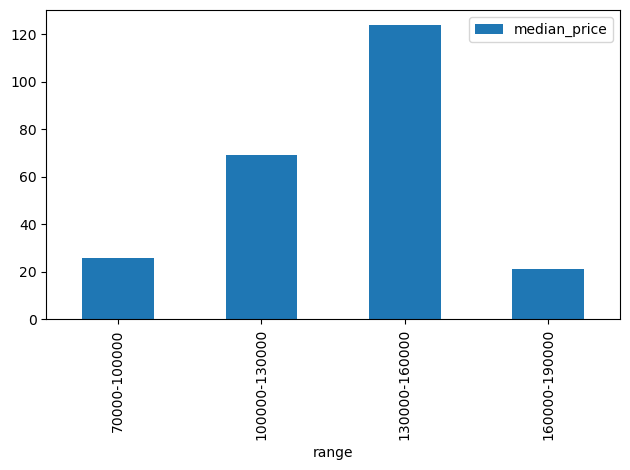

In [129]:
new_df = pd.DataFrame({'median_price': df['median_price']})
values = [70000, 100000, 130000, 160000, 190000]
labels = ['70000-100000', '100000-130000', '130000-160000', '160000-190000']
new_df['range'] = pd.cut(new_df['median_price'], values,labels=labels)
new_df_grouped = new_df.groupby('range')
df_res = new_df_grouped.count()
print(df_res)

df_res.plot.bar()
plt.tight_layout()
plt.savefig('plot_median_price.jpg')
plt.show()

In [50]:
prob_beamount = (df['city'].value_counts()['Beaumont']/len(df['city'])) * 100
print('beamount',prob_beamount)

prob_luglio = (df['month'].value_counts()[7]/len(df['month'])) * 100
print('lugio',prob_luglio)

new_df_combined = df['year'].astype(str) + '-' + df['month'].astype(str)
prob_dicembre_2012 = (new_df_combined.value_counts()['2012-12']/len(new_df_combined) * 100)
print('dicembre 2012', prob_dicembre_2012)

beamount 25.0
lugio 8.333333333333332
dicembre 2012 1.6666666666666667


In [67]:
def median_price_index(median_price: float) -> str:
    if median_price > 130000 and median_price < 160000:
        return 'prezzo molto frequente'
    if median_price > 100000 and median_price < 130000:
        return 'prezzo frequente'
    return 'prezzo poco frequente'

def sales_announcements_index(sales: int) -> int:
    sales_min = df['sales'].min()
    sales_max = df['sales'].max()
    return (sales - sales_min) / (sales_max - sales_min) * 10

df['median_price_index'] = df['median_price'].apply(median_price_index)
df['sales_announcements_index'] = df['sales'].apply(sales_announcements_index)
df

,city,year,month,sales,volume,median_price,listings,months_inventory,median_price_index,sales_announcements_index
0,Beaumont,2010,1,83,14.16,163800.0,1533,9.5,prezzo poco frequente,0.12
1,Beaumont,2010,2,108,17.69,138200.0,1586,10.0,prezzo molto frequente,0.84
2,Beaumont,2010,3,182,28.70,122400.0,1689,10.6,prezzo frequente,2.99
3,Beaumont,2010,4,200,26.82,123200.0,1708,10.6,prezzo frequente,3.52
4,Beaumont,2010,5,202,28.83,123100.0,1771,10.9,prezzo frequente,3.58
...,...,...,...,...,...,...,...,...,...,...
235,Wichita Falls,2014,8,137,16.13,99600.0,973,8.3,prezzo poco frequente,1.69
236,Wichita Falls,2014,9,110,12.02,90000.0,940,8.1,prezzo poco frequente,0.90
237,Wichita Falls,2014,10,112,13.82,113300.0,905,7.8,prezzo frequente,0.96
238,Wichita Falls,2014,11,96,11.31,108000.0,870,7.5,prezzo frequente,0.49


In [79]:
city = df['city'].describe()
print('city')
print(city)

year = df['year'].astype(str).describe()
print('\nyear')
print(year)

month = df['month'].astype(str).describe()
print('\nmonth')
print(month)



city
count          240
unique           4
top       Beaumont
freq            60
Name: city, dtype: object

year
count      240
unique       5
top       2010
freq        48
Name: year, dtype: object

month
count     240
unique     12
top         1
freq       20
Name: month, dtype: object


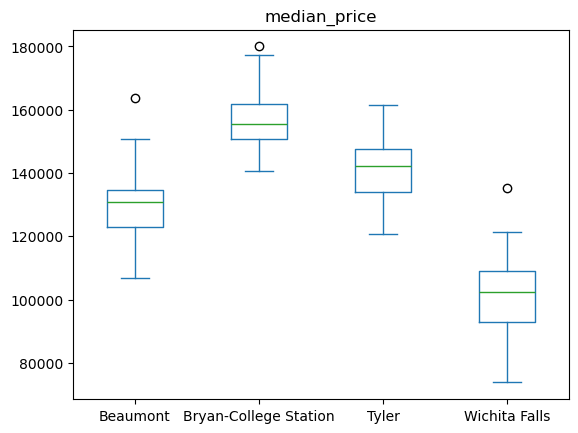

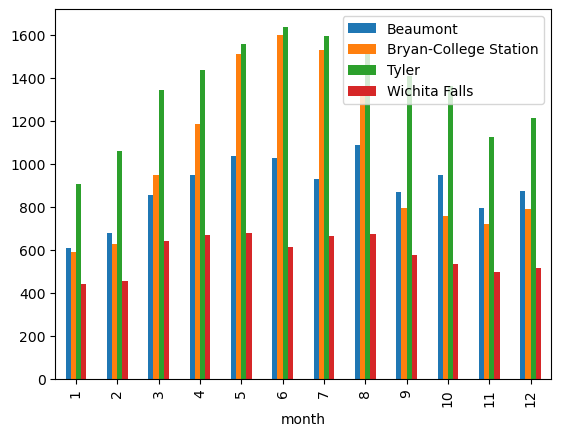

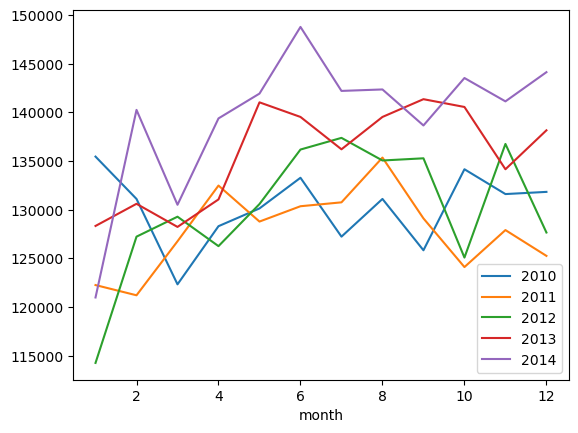

In [134]:
#boxplot prezzo medio città
df.plot.box(column='median_price', by='city')
plt.savefig('box_plot_median_price_city.jpg')
plt.show()

#bar charts vendite
df_sails_prince = pd.DataFrame({
    'Beaumont': df[df['city'] == 'Beaumont'].groupby('month')['sales'].sum(),
    'Bryan-College Station': df[df['city'] == 'Bryan-College Station'].groupby('month')['sales'].sum(),
    'Tyler': df[df['city'] == 'Tyler'].groupby('month')['sales'].sum(),
    'Wichita Falls': df[df['city'] == 'Wichita Falls'].groupby('month')['sales'].sum(),
})
df_sails_prince.plot.bar()
plt.savefig('bar_charts_sales.jpg')
plt.show()

#line charts prezzo vendita
df_median_prince = pd.DataFrame({
    '2010': df[df['year'] == 2010].groupby('month')['median_price'].mean(),
    '2011': df[df['year'] == 2011].groupby('month')['median_price'].mean(),
    '2012': df[df['year'] == 2012].groupby('month')['median_price'].mean(),
    '2013': df[df['year'] == 2013].groupby('month')['median_price'].mean(),
    '2014': df[df['year'] == 2014].groupby('month')['median_price'].mean(),
})
df_median_prince.plot()
plt.savefig('line_charts_median_price_year.jpg')
plt.show()